In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import OPTICS

from sklearn.mixture import GaussianMixture

from sklearn.neighbors import NearestNeighbors


In [ ]:
data=pd.read_csv('/content/cleaned_dataset.csv')
data.fillna(0,inplace=True)

In [ ]:
features=['Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo']

In [ ]:
X = data[features]

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:


pca = PCA(n_components=3)
X_pca = pca.fit_transform(data[features])
X_pca

array([[ 1.80152305e+01,  6.01951418e-01, -3.66907564e-01],
       [-2.77505908e+01,  2.51878869e+00, -2.92576969e-01],
       [-1.24581332e+01,  4.05087057e+00, -1.14568230e-01],
       ...,
       [ 4.78823206e+01,  1.89959237e+00,  4.41730897e-02],
       [ 3.48910309e+01,  2.86240277e+00,  2.24409846e-01],
       [ 3.95661011e+01,  2.20672714e+00,  2.31278982e-01]])

# Clustering Models

### 1 DBSCAN

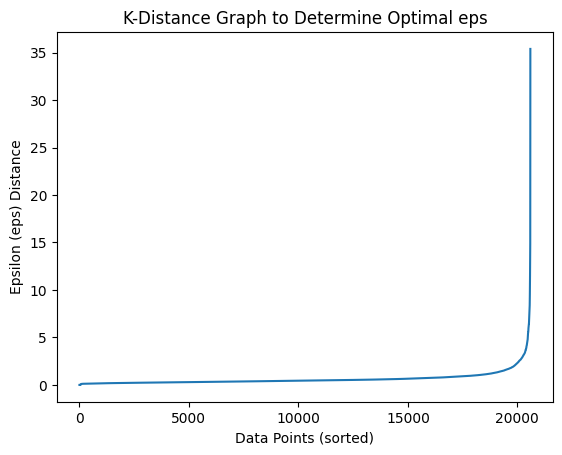

In [12]:
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(X_pca)
distances, indices = neigh.kneighbors(X_pca)

# Sort and plot k-distances
distances = np.sort(distances[:, -1], axis=0)
plt.plot(distances)
plt.xlabel("Data Points (sorted)")
plt.ylabel("Epsilon (eps) Distance")
plt.title("K-Distance Graph to Determine Optimal eps")
plt.show()

In [31]:
dbscan = DBSCAN(eps=0.5, min_samples=11)
labels = dbscan.fit_predict(X_pca)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

valid_labels = labels[labels != -1]
valid_X = X_pca[labels != -1]
score = silhouette_score(valid_X, valid_labels)
print(f"DBSCAN Silhouette Score: {score:.4f}")

calinski_harabasz = calinski_harabasz_score(valid_X, valid_labels)
print(f"DBSCAN Calinski-Harabasz Index: {calinski_harabasz}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(valid_X, valid_labels)
print(f"DBSCAN Davies-Bouldin Index: {davies_bouldin}")

Number of clusters: 98
Number of noise points: 6492
DBSCAN Silhouette Score: -0.2717
Calinski-Harabasz Index: 3860.937308895633
Davies-Bouldin Index: 0.8560424881928176


In [32]:
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = labels

fig = px.scatter_3d(df_pca, x="PCA1", y="PCA2", z="PCA3", color=df_pca["Cluster"].astype(str),
                     title="DBSCAN Cluster Visualization", opacity=0.7)
fig.show()

### 2 Agglomerative Clustering

In [23]:
agglo = AgglomerativeClustering(n_clusters=25, linkage='complete')  # Try 'average' or 'complete' linkage too
labels = agglo.fit_predict(X_pca)

score = silhouette_score(X_pca, labels)
print(f"Agglomerative Clustering Silhouette Score: {score:.4f}")

calinski_harabasz = calinski_harabasz_score(X_pca, labels)
print(f"Agglomerative Clustering Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(X_pca, labels)
print(f"Agglomerative Clustering Davies-Bouldin Index: {davies_bouldin}")

Agglomerative Clustering Silhouette Score: 0.3205
Calinski-Harabasz Index: 23646.22521327451
Davies-Bouldin Index: 0.7640039937325369


In [24]:
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = labels

fig = px.scatter_3d(df_pca, x="PCA1", y="PCA2", z="PCA3", color=df_pca["Cluster"].astype(str),
                     title="Agglomerative Clustering Cluster Visualization", opacity=0.7)
fig.show()

### 3 Gaussian Mixture Model

In [25]:
gmm = GaussianMixture(n_components=25, random_state=42)
labels = gmm.fit_predict(X_pca)

score = silhouette_score(X_pca, labels)
print(f"GMM Silhouette Score: {score:.4f}")

calinski_harabasz = calinski_harabasz_score(X_pca, labels)
print(f"GMM Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(X_pca, labels)
print(f"GMMDavies-Bouldin Index: {davies_bouldin}")

GMM Silhouette Score: 0.2150
Calinski-Harabasz Index: 15659.262708163113
Davies-Bouldin Index: 1.5720222041082297


In [27]:
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = labels

fig = px.scatter_3d(df_pca, x="PCA1", y="PCA2", z="PCA3", color=df_pca["Cluster"].astype(str),
                     title="GMM Cluster Visualization", opacity=0.7)
fig.show()

### 4 OPTICS

In [34]:
optics = OPTICS(min_samples=11, metric='euclidean')
labels = optics.fit_predict(X_pca)

valid_labels = labels[labels != -1]
valid_X = X_pca[labels != -1]
score = silhouette_score(valid_X, valid_labels)
print(f"OPTICS Silhouette Score: {score:.4f}")

calinski_harabasz = calinski_harabasz_score(X_pca, labels)
print(f"OPTICS Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(X_pca, labels)
print(f"OPTICS Davies-Bouldin Index: {davies_bouldin}")

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning:

divide by zero encountered in divide



OPTICS Silhouette Score: 0.6119
OPTICS Calinski-Harabasz Index: 28.086451499364497
OPTICS Davies-Bouldin Index: 2.5191349570964667


In [35]:
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = labels

fig = px.scatter_3d(df_pca, x="PCA1", y="PCA2", z="PCA3", color=df_pca["Cluster"].astype(str),
                     title="OPTICS Cluster Visualization", opacity=0.7)
fig.show()

### 5 K Means

In [36]:
inertia = []
for i in range(10,200,10):
  kmeans = KMeans(n_clusters=i,n_init=10, random_state=42)
  kmeans.fit(X_pca)
  inertia.append(kmeans.inertia_)

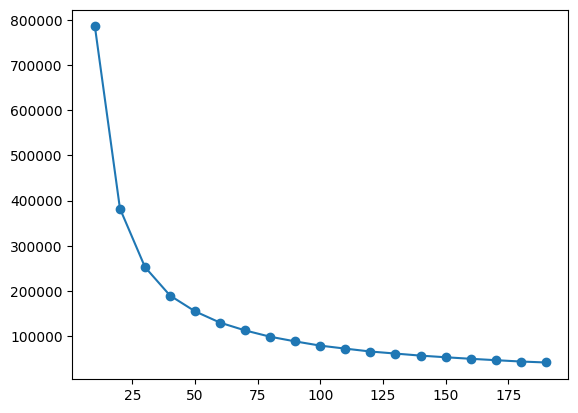

In [37]:
plt.plot(range(10,200,10),inertia, marker='o')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=40, n_init=10,  random_state=42)
data['Cluster']=kmeans.fit_predict(X_pca)
data1 = data.groupby(['Cluster'])

In [39]:
label=kmeans.labels_

score = silhouette_score(X_pca, label)
print(f"KMeans Silhouette Score: {score}")

calinski_harabasz = calinski_harabasz_score(X_pca, label)
print(f"KMeans Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(X_pca, label)
print(f"KMeans Davies-Bouldin Index: {davies_bouldin}")

KMeans Silhouette Score: 0.3608651113336281
KMeans Calinski-Harabasz Index: 50832.362475458365
KMeans Davies-Bouldin Index: 0.7915660978024992


In [40]:
labels = kmeans.labels_
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2", "PCA3"])
df_pca["Cluster"] = labels

fig = px.scatter_3d(df_pca, x="PCA1", y="PCA2", z="PCA3", color=df_pca["Cluster"].astype(str),
                     title="3D Cluster Visualization", opacity=0.7)
fig.show()